# Settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/koreankiwi99/ada_movie.git
%cd ada_movie

Cloning into 'ada_movie'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 32 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 11.47 KiB | 469.00 KiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/ada_movie


In [3]:
!pip install wordcloud
!pip install regex

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 6.7 MB/s eta 0:00:00


In [25]:
import tarfile
import os
import pandas as pd
import pickle
from pathlib import Path
from tqdm import tqdm
import json
import sys
import numpy as np
from collections import Counter, defaultdict
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval

In [5]:
from src.dataset.character import CharacterDataset
from src.dataset.event import EventDataset
from src.utils import filter_texts, display_wordclouds

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
plot_path = '/content/drive/MyDrive/ADA/data/plot_df.csv'
plot_df = pd.read_csv(plot_path)

In [7]:
plot_df.head(3), plot_df.shape

(   Wikipedia_movie_ID                                               Plot
 0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
 1            31186339  The nation of Panem consists of a wealthy Capi...
 2            20663735  Poovalli Induchoodan  is sentenced for six yea...,
 (42306, 2))

# Character/Mention Count Analysis

```
gender_count = []
gender_ratio = []
gender_sum_mention = []
gender_ratio_mention = []

for plot_path in tqdm(plot_path_list):
  data = CharacterDataset(plot_path)
  gender_count.append(data.gender_count)
  gender_ratio.append(data.gender_ratio)
  gender_sum_mention.append(data.gender_sum_mention)
  gender_ratio_mention.append(data.gender_ratio_mention)
  del data
  gc.collect()
```


```
gender_count_df = pd.DataFrame(gender_count)
gender_ratio_df = pd.DataFrame(gender_ratio)
gender_sum_mention_df = pd.DataFrame(gender_sum_mention)
gender_ratio_mention_df = pd.DataFrame(gender_ratio_mention)
```



```
gender_count_df.fillna(0, inplace=True)
gender_ratio_df.fillna(0, inplace=True)
gender_sum_mention_df.fillna(0, inplace=True)
gender_ratio_mention_df.fillna(0, inplace=True)
```






## Load Data

In [10]:
gender_count_df = pd.read_csv('/content/drive/MyDrive/ADA/gender_count_with_id.csv')
gender_count_df.head(3)

,wiki_id,plural,female,male,unknown,neutral
0,23890098,1.0,0.0,0.0,0.0,0.0
1,31186339,3.0,6.0,5.0,1.0,0.0
2,20663735,0.0,2.0,9.0,1.0,0.0


In [11]:
gender_ratio_df = pd.read_csv('/content/drive/MyDrive/ADA/gender_ratio_with_id.csv')
gender_ratio_df.head(3)

,wiki_id,plural,female,male,unknown,neutral
0,23890098,1.0,0.000000,0.000000,0.000000,0.0
1,31186339,0.2,0.400000,0.333333,0.066667,0.0
2,20663735,0.0,0.166667,0.750000,0.083333,0.0


In [12]:
gender_sum_mention_df = pd.read_csv('/content/drive/MyDrive/ADA/gender_sum_mention_with_id.csv')
gender_sum_mention_df.head(3)

,wiki_id,plural,female,male,unknown,neutral
0,23890098,2.0,0.0,0.0,0.0,0.0
1,31186339,11.0,72.0,40.0,2.0,0.0
2,20663735,0.0,9.0,70.0,2.0,0.0


In [13]:
gender_ratio_mention_df = pd.read_csv('/content/drive/MyDrive/ADA/gender_ratio_mention_with_id.csv')
gender_ratio_mention_df.head(3)

,wiki_id,plural,female,male,unknown,neutral
0,23890098,2.000000,0.0,0.000000,0.0,0.0
1,31186339,3.666667,12.0,8.000000,2.0,0.0
2,20663735,0.000000,4.5,7.777778,2.0,0.0


## Character Count by Gender

In [14]:
print("Character Count by Gender Summary Statistics:\n", gender_count_df.describe())
print("\nGender Ratio Summary Statistics:\n", gender_ratio_df.describe())

Character Count by Gender Summary Statistics:
             wiki_id        plural        female          male       unknown  \
count  4.230600e+04  42306.000000  42306.000000  42306.000000  42306.000000   
mean   1.497099e+07      1.576018      1.443294      2.915071      0.782040   
std    1.111986e+07      2.132831      1.682803      2.691584      1.312502   
min    3.300000e+02      0.000000      0.000000      0.000000      0.000000   
25%    4.566111e+06      0.000000      0.000000      1.000000      0.000000   
50%    1.284786e+07      1.000000      1.000000      2.000000      0.000000   
75%    2.485175e+07      2.000000      2.000000      4.000000      1.000000   
max    3.750192e+07     27.000000     21.000000     34.000000     17.000000   

            neutral  
count  42306.000000  
mean       0.000307  
std        0.017527  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

Gender Ratio Summary Statistics:
         

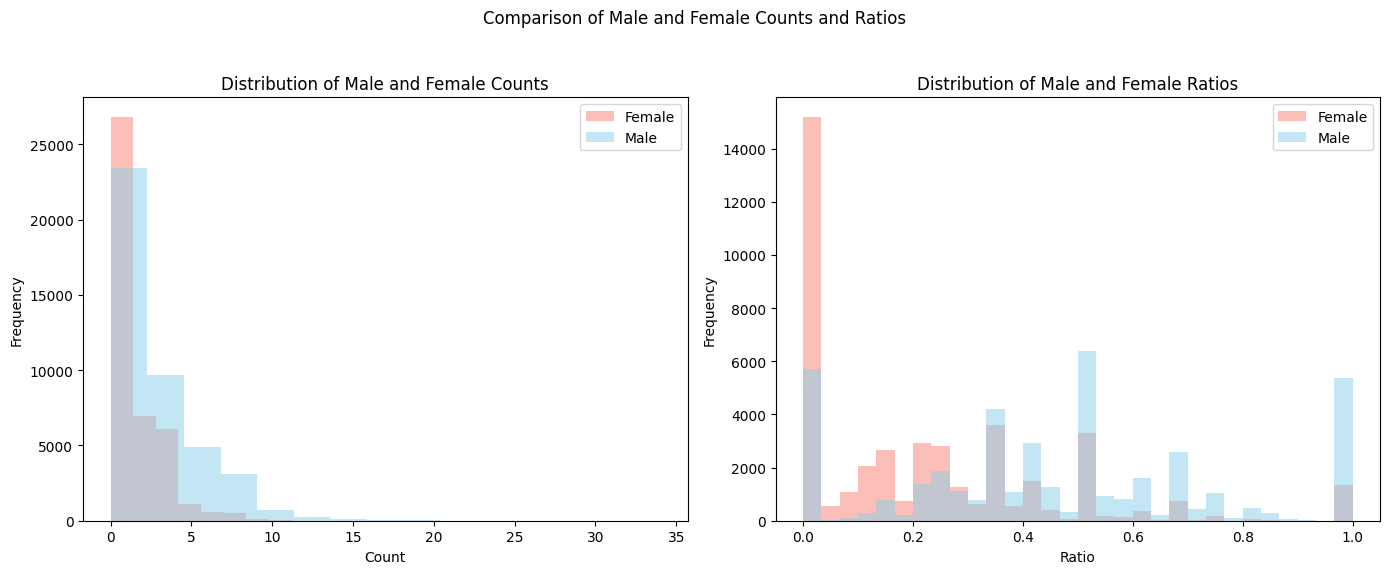

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Counts and Ratios")

# 1. Overlaid Histograms for Counts
axes[0].hist(gender_count_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_count_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Counts")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# 2. Overlaid Histograms for Ratios
axes[1].hist(gender_ratio_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratios")
axes[1].set_xlabel("Ratio")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Character Mention Count by Gender

In [18]:
print("\nGender Sum Mention Summary Statistics:\n", gender_sum_mention_df.describe())
print("\nGender Ratio Mention Summary Statistics:\n", gender_ratio_mention_df.describe())


Gender Sum Mention Summary Statistics:
             wiki_id        plural        female          male       unknown  \
count  4.230600e+04  42306.000000  42306.000000  42306.000000  42306.000000   
mean   1.497099e+07      6.267763     12.666359     27.205148      1.898360   
std    1.111986e+07     10.985698     22.257394     35.179078      3.402638   
min    3.300000e+02      0.000000      0.000000      0.000000      0.000000   
25%    4.566111e+06      0.000000      0.000000      4.000000      0.000000   
50%    1.284786e+07      2.000000      4.000000     13.000000      0.000000   
75%    2.485175e+07      8.000000     15.000000     38.000000      2.000000   
max    3.750192e+07    196.000000    405.000000    575.000000     56.000000   

            neutral  
count  42306.000000  
mean       0.002080  
std        0.167986  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       29.000000  

Gender Ratio Mention Summary Statistics:
       

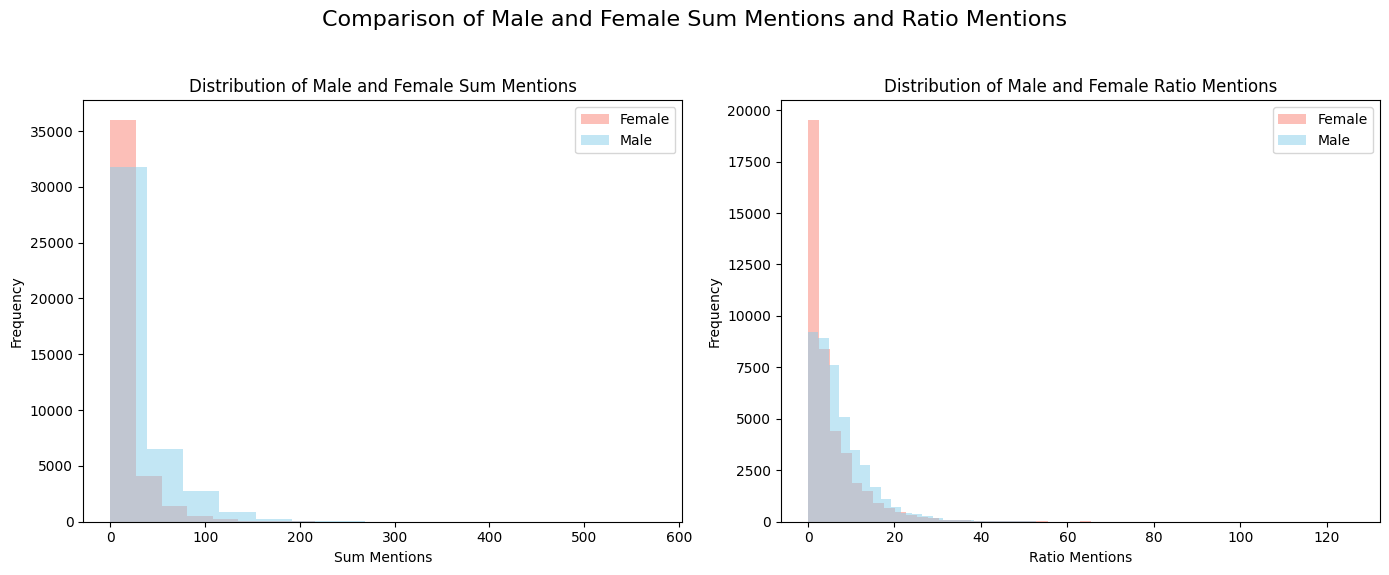

In [19]:
# Plotting male and female comparisons for Sum Mentions and Ratio Mentions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Sum Mentions and Ratio Mentions", fontsize=16)

# 1. Overlaid Histogram for Sum Mentions
axes[0].hist(gender_sum_mention_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_sum_mention_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Sum Mentions")
axes[0].set_xlabel("Sum Mentions")
axes[0].set_ylabel("Frequency")
axes[0].legend(loc='upper right')

# 2. Overlaid Histogram for Ratio Mentions
axes[1].hist(gender_ratio_mention_df['female'], bins=50, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_mention_df['male'], bins=50, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratio Mentions")
axes[1].set_xlabel("Ratio Mentions")
axes[1].set_ylabel("Frequency")
axes[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Related Event Analysis
- how to get the data from our codes in src
```
female_agent_events = []
male_agent_events = []
female_patient_events = []
male_patient_events = []
female_poss_events = []
male_poss_events = []

for plot_path in tqdm(plot_path_list):
  data = EventDataset(plot_path)
  female_agent_events.append(data.agent_events['female'])
  male_agent_events.append(data.agent_events['male'])
  female_patient_events.append(data.patient_events['female'])
  male_patient_events.append(data.patient_events['male'])
  female_poss_events.append(data.poss_events['female'])
  male_poss_events.append(data.poss_events['male'])
  del data
  gc.collect()
```


```
female_agent_df = pd.DataFrame([female_agent_events]).T
female_agent_df.columns = ['events']
female_agent_df['wiki_id'] = plot_df['Wikipedia_movie_ID']
female_agent_df.to_csv('/content/drive/MyDrive/ADA/female_agent_events_with_id.csv', index=False)

male_agent_df = pd.DataFrame([male_agent_events]).T
male_agent_df.columns = ['events']
male_agent_df['wiki_id'] = plot_df['Wikipedia_movie_ID']
male_agent_df.to_csv('/content/drive/MyDrive/ADA/male_agent_events_with_id.csv', index=False)

female_patient_df = pd.DataFrame([female_patient_events]).T
female_patient_df.columns = ['events']
female_patient_df['wiki_id'] = plot_df['Wikipedia_movie_ID']
female_patient_df.to_csv('/content/drive/MyDrive/ADA/female_patient_events_with_id.csv', index=False)

male_patient_df = pd.DataFrame([male_patient_events]).T
male_patient_df.columns = ['events']
male_patient_df['wiki_id'] = plot_df['Wikipedia_movie_ID']
male_patient_df.to_csv('/content/drive/MyDrive/ADA/male_patient_events_with_id.csv', index=False)

female_poss_df = pd.DataFrame([female_poss_events]).T
female_poss_df.columns = ['events']
female_poss_df['wiki_id'] = plot_df['Wikipedia_movie_ID']
female_poss_df.to_csv('/content/drive/MyDrive/ADA/female_poss_events_with_id.csv', index=False)

male_poss_df = pd.DataFrame([male_poss_events]).T
male_poss_df.columns = ['events']
male_poss_df['wiki_id'] = plot_df['Wikipedia_movie_ID']
male_poss_df.to_csv('/content/drive/MyDrive/ADA/male_poss_events_with_id.csv', index=False)
```




## Load Data

In [27]:
male_agent_df = pd.read_csv('/content/drive/MyDrive/ADA/male_agent_events_with_id.csv')
male_agent_df.head(3)

,events,wiki_id
0,[],23890098
1,"['reveal', 'mean', 'say', 'form', 'beg', 'fall...",31186339
2,"['lose', 'thwart', 'fall', 'accept', 'decide',...",20663735


In [29]:
female_agent_df = pd.read_csv('/content/drive/MyDrive/ADA/female_agent_events_with_id.csv')
female_agent_df.head(3)

,events,wiki_id
0,[],23890098
1,"['starve', 'discover', 'survive', 'drop', 'rec...",31186339
2,"['come', 'return', 'refuse', 'banish']",20663735


In [31]:
male_patient_df = pd.read_csv('/content/drive/MyDrive/ADA/male_patient_events_with_id.csv')
male_patient_df.head(3)

,events,wiki_id
0,[],23890098
1,"['take', 'present', 'find', 'force', 'encounte...",31186339
2,"['release', 'accuse', 'judge', 'thwart', 'conf...",20663735


In [33]:
female_patient_df = pd.read_csv('/content/drive/MyDrive/ADA/female_patient_events_with_id.csv')
female_patient_df.head(3)

,events,wiki_id
0,[],23890098
1,"['take', 'find', 'corner', 'warn', 'present', ...",31186339
2,"['banish', 'murder']",20663735


In [36]:
male_poss_df = pd.read_csv('/content/drive/MyDrive/ADA/male_poss_events_with_id.csv')
male_poss_df.head(3)

,events,wiki_id
0,[],23890098
1,"['love', 'displeasure']",31186339
2,"['life', 'henchmen', 'uncle', 'friend', 'fathe...",20663735


In [37]:
female_poss_df = pd.read_csv('/content/drive/MyDrive/ADA/female_poss_events_with_id.csv')
female_poss_df.head(3)

,events,wiki_id
0,[],23890098
1,"['name', 'katniss', 'display', 'attention', 'b...",31186339
2,['protection'],20663735


## Preprocess Data

In [28]:
male_agent_events = sum(male_agent_df['events'].apply(literal_eval), [])
male_agent_events = filter_texts(male_agent_events)

In [30]:
female_agent_events = sum(female_agent_df['events'].apply(literal_eval), [])
female_agent_events = filter_texts(female_agent_events)

In [32]:
male_patient_events = sum(male_patient_df['events'].apply(literal_eval), [])
male_patient_events = filter_texts(male_patient_events)

In [35]:
female_patient_events = sum(female_patient_df['events'].apply(literal_eval), [])
female_patient_events = filter_texts(female_patient_events)

In [38]:
male_poss_events = sum(male_poss_df['events'].apply(literal_eval), [])
male_poss_events = filter_texts(male_poss_events)

In [39]:
female_poss_events = sum(female_poss_df['events'].apply(literal_eval), [])
female_poss_events = filter_texts(female_poss_events)

## Possessive Words

### Raw Version

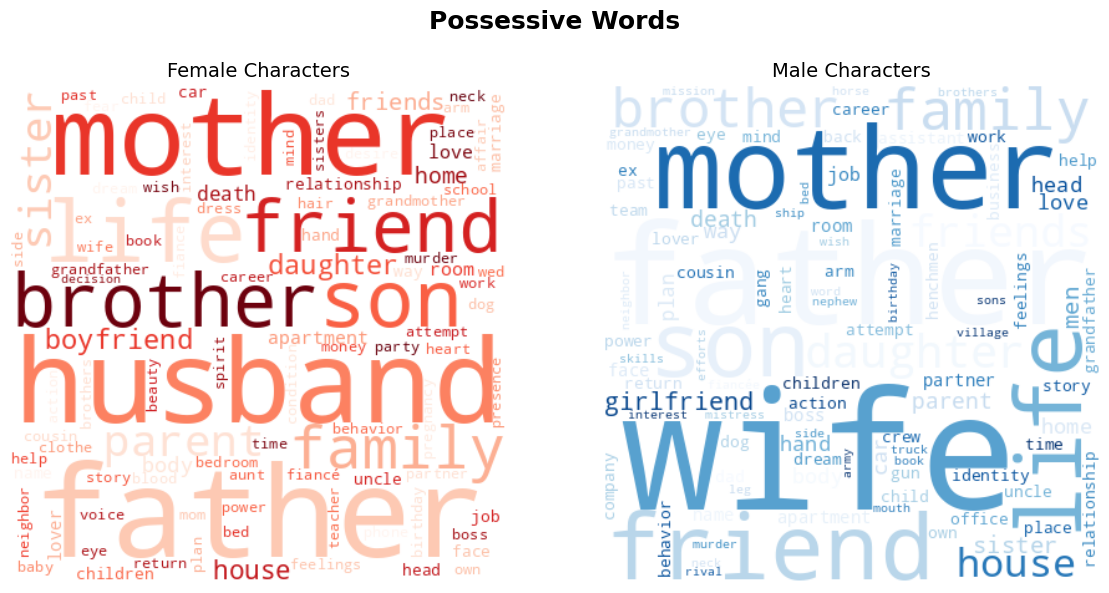

In [40]:
display_wordclouds(Counter(male_poss_events),
                   Counter(female_poss_events),
                   "Possessive Words",
                   max_words = 100)

### P2 Version
- Words only associated with female/male characters

In [41]:
male_only_poss = set(male_poss_events) - set(female_poss_events)
female_only_poss = set(female_poss_events) - set(male_poss_events)
both_poss = set(male_poss_events) & set(female_poss_events)

In [43]:
male_poss_only = Counter([_ for _ in male_poss_events if _ in male_only_poss])
female_poss_only = Counter([_ for _ in female_poss_events if _ in female_only_poss])

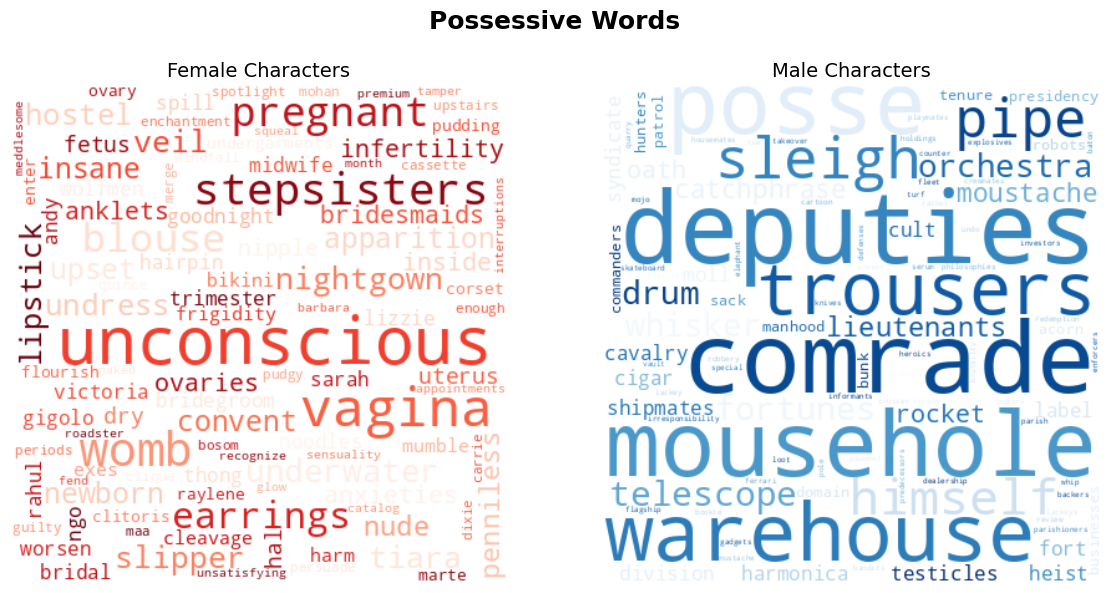

In [44]:
display_wordclouds(male_poss_only,
                   female_poss_only,
                   "Possessive Words",
                  max_words = 100)

## Agent Words




### Raw Version

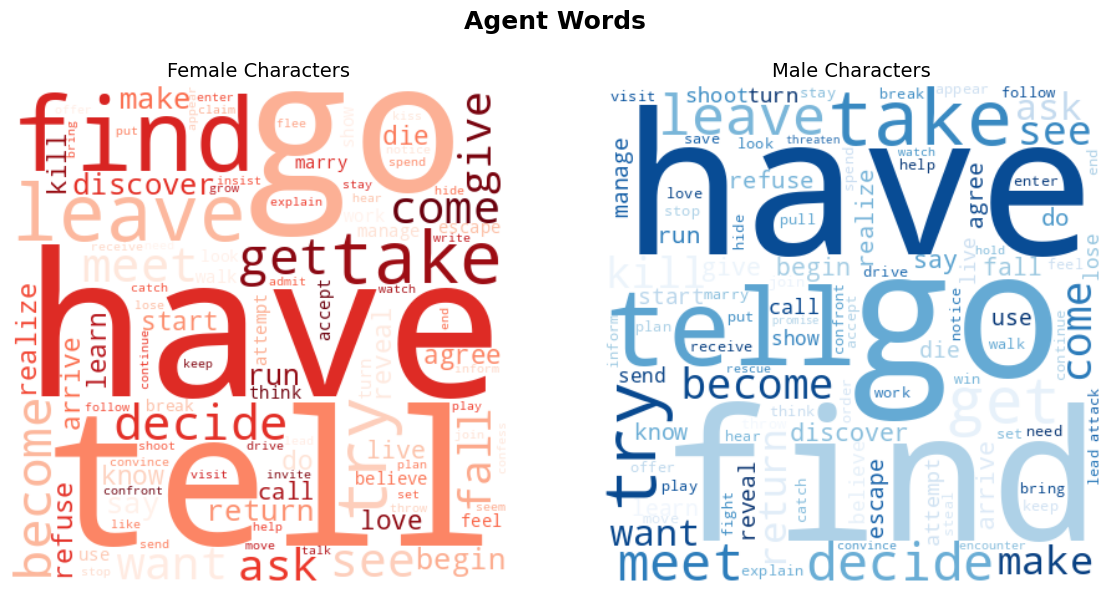

In [45]:
display_wordclouds(Counter(male_agent_events), Counter(female_agent_events), "Agent Words")

### P2 Version

In [46]:
male_only_agent = set(male_agent_events) - set(female_agent_events)
female_only_agent = set(female_agent_events) - set(male_agent_events)
both_agent = set(male_agent_events) & set(female_agent_events)

In [49]:
male_agent_only = Counter([_ for _ in male_agent_events if _ in male_only_agent])
female_agent_only = Counter([_ for _ in female_agent_events if _ in female_only_agent])

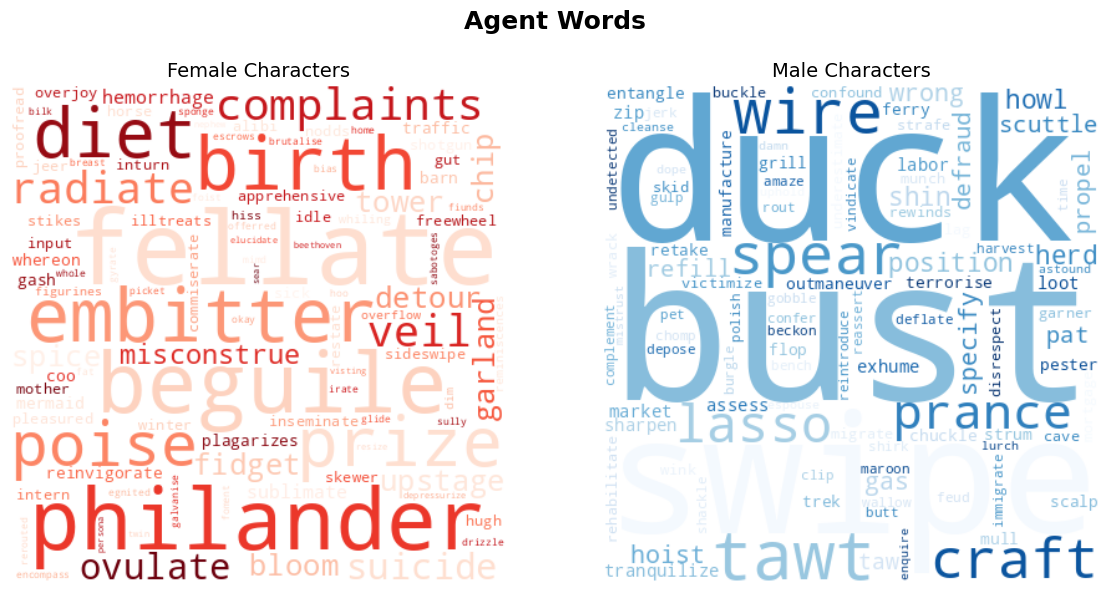

In [50]:
display_wordclouds(male_agent_only, female_agent_only, "Agent Words")

In [51]:
Counter([_ for _ in male_agent_events if _ in male_only_agent]).most_common(30)

[('bust', 31),
 ('duck', 29),
 ('swipe', 21),
 ('tawt', 16),
 ('wire', 16),
 ('spear', 15),
 ('craft', 14),
 ('lasso', 13),
 ('prance', 13),
 ('position', 12),
 ('howl', 12),
 ('herd', 12),
 ('shin', 12),
 ('wrong', 11),
 ('hoist', 11),
 ('specify', 11),
 ('gas', 11),
 ('pat', 10),
 ('refill', 10),
 ('scuttle', 10),
 ('propel', 10),
 ('defraud', 10),
 ('taw', 9),
 ('tranquilize', 9),
 ('labor', 9),
 ('zip', 9),
 ('market', 9),
 ('assess', 9),
 ('sharpen', 9),
 ('exhume', 9)]

In [52]:
Counter([_ for _ in female_agent_events if _ in female_only_agent]).most_common(30)

[('fellate', 6),
 ('philander', 4),
 ('beguile', 4),
 ('birth', 3),
 ('embitter', 3),
 ('prize', 3),
 ('diet', 3),
 ('poise', 3),
 ('complaints', 3),
 ('radiate', 3),
 ('veil', 3),
 ('ovulate', 2),
 ('suicide', 2),
 ('upstage', 2),
 ('detour', 2),
 ('tower', 2),
 ('fidget', 2),
 ('spice', 2),
 ('bloom', 2),
 ('chip', 2),
 ('garland', 2),
 ('misconstrue', 2),
 ('hemorrhage', 2),
 ('sublimate', 2),
 ('plagarizes', 2),
 ('barn', 2),
 ('whereon', 2),
 ('reinvigorate', 2),
 ('mermaid', 2),
 ('coo', 2)]

## Patient Words

### Raw Version

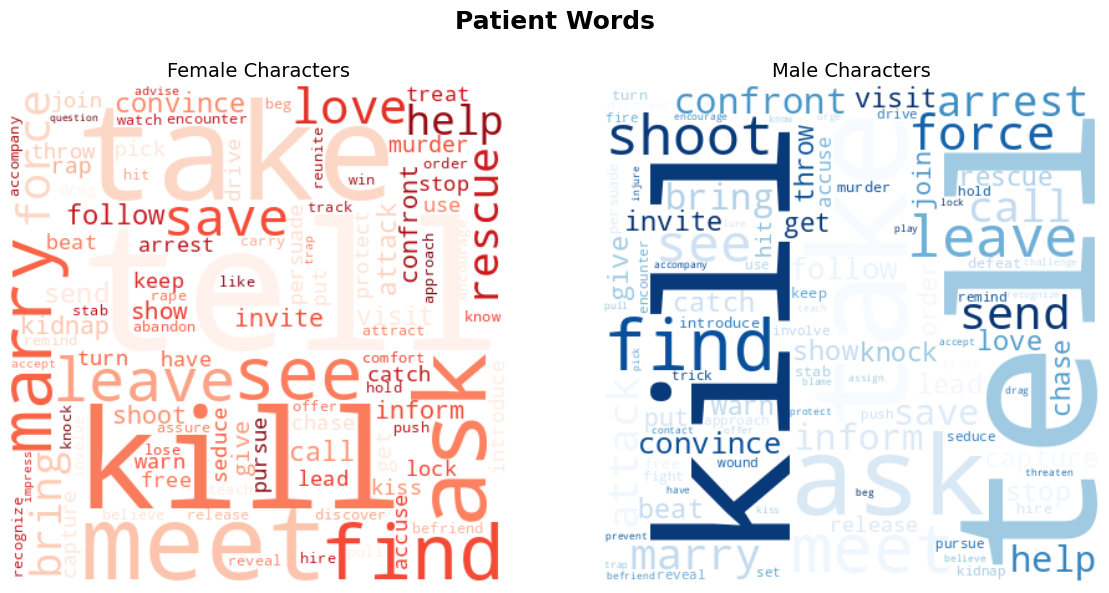

In [53]:
display_wordclouds(Counter(male_patient_events),
                   Counter(female_patient_events), "Patient Words")

### P2 Version

In [54]:
male_only_patient = set(male_patient_events) - set(female_patient_events)
female_only_patient = set(female_patient_events) - set(male_patient_events)
both_patient = set(male_patient_events) & set(female_patient_events)

In [55]:
male_patient_only = Counter([_ for _ in male_patient_events if _ in male_only_patient])
female_patient_only = Counter([_ for _ in female_patient_events if _ in female_only_patient])

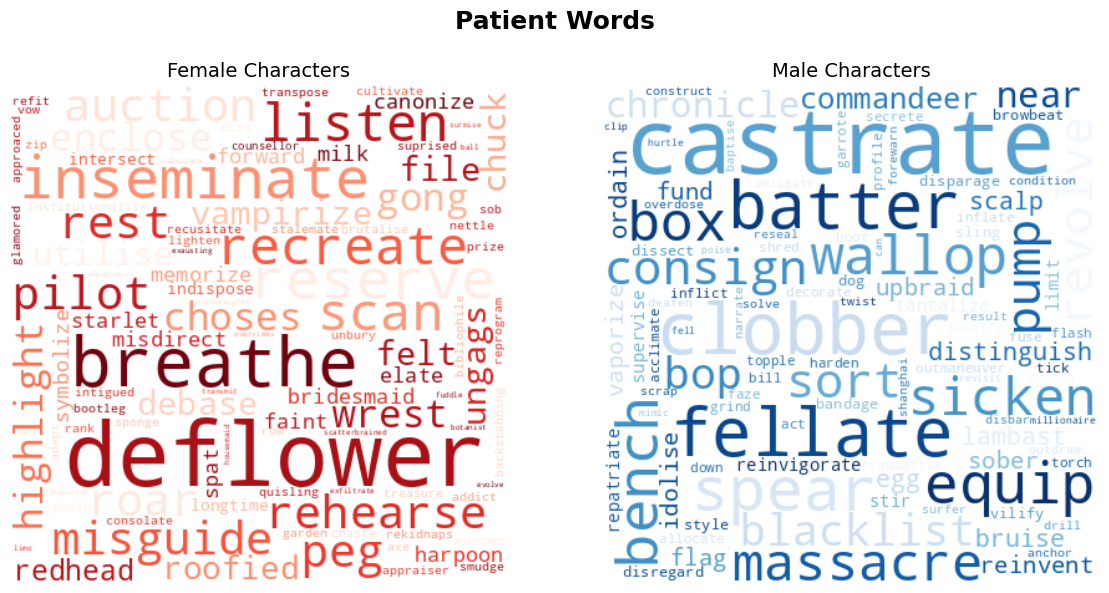

In [56]:
display_wordclouds(male_patient_only, female_patient_only, "Patient Words")

In [57]:
Counter([_ for _ in male_patient_events if _ in male_only_patient]).most_common(30)

[('castrate', 29),
 ('clobber', 17),
 ('fellate', 15),
 ('batter', 14),
 ('spear', 13),
 ('equip', 11),
 ('bench', 11),
 ('box', 10),
 ('wallop', 10),
 ('sicken', 9),
 ('massacre', 9),
 ('revolve', 8),
 ('consign', 8),
 ('sort', 8),
 ('pump', 8),
 ('blacklist', 8),
 ('bop', 8),
 ('chronicle', 8),
 ('near', 8),
 ('commandeer', 7),
 ('distinguish', 7),
 ('lambast', 7),
 ('bruise', 7),
 ('scalp', 7),
 ('ordain', 7),
 ('egg', 7),
 ('fund', 6),
 ('upbraid', 6),
 ('reinvent', 6),
 ('flag', 6)]

In [58]:
Counter([_ for _ in female_patient_events if _ in female_only_patient]).most_common(30)

[('deflower', 13),
 ('breathe', 7),
 ('reserve', 5),
 ('inseminate', 5),
 ('recreate', 4),
 ('listen', 4),
 ('scan', 4),
 ('peg', 3),
 ('misguide', 3),
 ('rehearse', 3),
 ('pilot', 3),
 ('auction', 3),
 ('roar', 3),
 ('rest', 3),
 ('wrest', 2),
 ('gong', 2),
 ('enclose', 2),
 ('highlight', 2),
 ('choses', 2),
 ('vampirize', 2),
 ('file', 2),
 ('ungags', 2),
 ('felt', 2),
 ('debase', 2),
 ('utilise', 2),
 ('chuck', 2),
 ('roofied', 2),
 ('redhead', 2),
 ('bridesmaid', 2),
 ('harpoon', 2)]